In [1]:
import regex
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# lemmatizer.lemmatize("cats") 

# Should see 'cat'

In [8]:
# importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [9]:
# Reading in Data
ames_df = pd.read_csv('./datasets/train.csv')

In [10]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [11]:
ames_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [12]:
ames_df['Exter Qual'] = ames_df['Exter Qual'].map(
    {'Ex': 2, 'Gd': 1.5, 'TA': 1, 'Fa': 0.5, 'Po': 0})

ames_df['Exter Cond'] = ames_df['Exter Cond'].map(
    {'Ex': 2, 'Gd': 1.5, 'TA': 1, 'Fa': 0.5, 'Po': 0})


ames_df['Bsmt Cond'] = ames_df['Bsmt Cond'].map(
    {'Ex': 2, 'Gd': 1.5, 'TA': 1, 'Fa': 0.5, 'Po': 0, 'none': 0})

ames_df['BsmtFin Type 1'] = ames_df['BsmtFin Type 1'].map(
    {'GLQ': 2, 'ALQ': 1, 'Rec': 0.5, 'BLQ': 0, 'Unf': 0, 'LwQ': 0, 'none': 0})
ames_df['BsmtFin Type 2'] = ames_df['BsmtFin Type 2'].map(
    {'GLQ': 2, 'ALQ': 1, 'Rec': 0.5, 'BLQ': 0, 'Unf': 0, 'LwQ': 0, 'none': 0})

ames_df['Kitchen Qual'] = ames_df['Kitchen Qual'].map(
    {'Ex': 2, 'Gd': 1.5, 'TA': 1, 'Fa': 0, 'Po': 0})

### First Look

- 81 columns, 2051 rows in training data.
- The alley, pool QC, Fence, and Misc Feature columns have little data; along with a few others.
- Id and PID are unique identifiers not needed for regression

In [13]:
# Dropping PID Column
ames_df.drop(columns=['PID'], inplace=True)

ames_df.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [14]:
# Totaling N/A values
ames_df.isna().sum().sort_values(ascending=False)[:30]

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Qual        114
Garage Finish      114
Garage Cond        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Year Built           0
Exterior 2nd         0
Exterior 1st         0
Roof Matl            0
dtype: int64

In [15]:
# Calculating NA/Null Percentage
missing_data = (ames_df.isnull().sum() / len(ames_df)) * 100
missing_data = missing_data.drop(missing_data[missing_data == 0].index).sort_values(ascending=False)[:25]
missing_data = pd.DataFrame({'Percent Missing' :missing_data})
missing_data.head(20)

,Percent Missing
Pool QC,99.561190
Misc Feature,96.830814
Alley,93.174061
Fence,80.497318
Fireplace Qu,48.756704
Lot Frontage,16.089712
Garage Yr Blt,5.558264
Garage Cond,5.558264
Garage Qual,5.558264
Garage Finish,5.558264


''

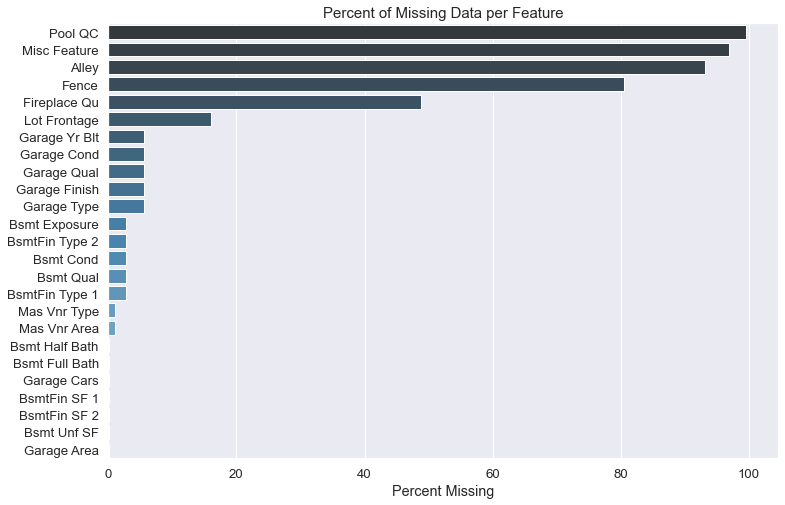

In [16]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.2)
sns.barplot(x=missing_data["Percent Missing"],
            y=missing_data.index, palette="Blues_d")

plt.title("Percent of Missing Data per Feature", fontsize=15)
;

#### Insights
- Features missing values seem to indicate that the property lacks the feature.

### Understand Target Variable:  SalePrice

''

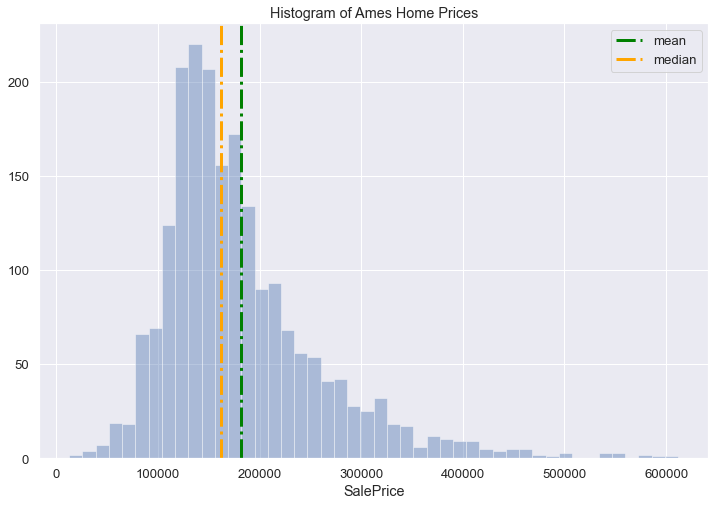

In [17]:
plt.figure(figsize=(12, 8))
sns.distplot(ames_df['SalePrice'], kde=False)
plt.axvline(ames_df['SalePrice'].mean(), color='green',
            linestyle='-.', label='mean', lw=3)
plt.axvline(ames_df['SalePrice'].median(), color='orange',
            linestyle='-.', label='median', lw=3)
plt.legend()
plt.title('Histogram of Ames Home Prices')
;

In [18]:
print(f"Median SalePrice: {round(ames_df['SalePrice'].median(), 2)}")
print(f"Average SalePrice: {round(ames_df['SalePrice'].mean(), 2)}")
print(f"Sale Price Stdv: {round(ames_df['SalePrice'].std(), 2)}")

Median SalePrice: 162500.0
Average SalePrice: 181469.7
Sale Price Stdv: 79258.66


#### Insights
- Right skewed
- Average home price is $181,500


#### Taking the natural log of SalePrice may help distribution

''

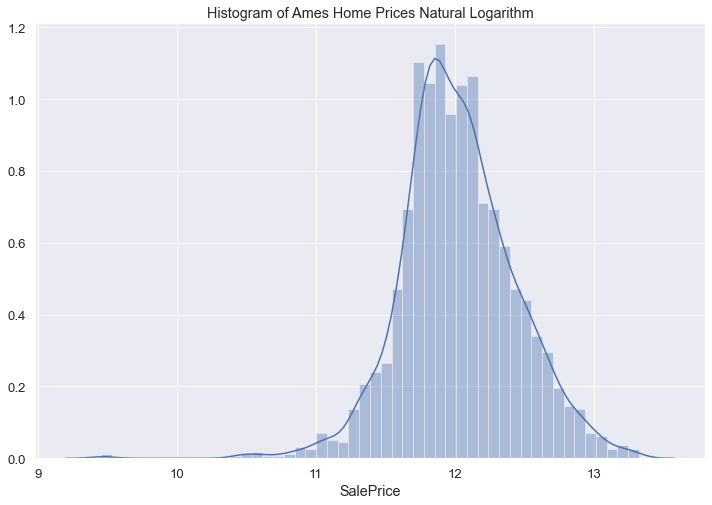

In [19]:
plt.figure(figsize=(12, 8))
sns.distplot(np.log(ames_df['SalePrice']))
plt.title('Histogram of Ames Home Prices Natural Logarithm')
;

In [20]:
print(f"SalePrice Log Mean: {np.log(ames_df['SalePrice']).mean()}")
print(f"SalePrice Log Stdv: {np.log(ames_df['SalePrice']).std()}")

SalePrice Log Mean: 12.024396927855056
SalePrice Log Stdv: 0.41131641613641756


### Histograms for Quantitative Features

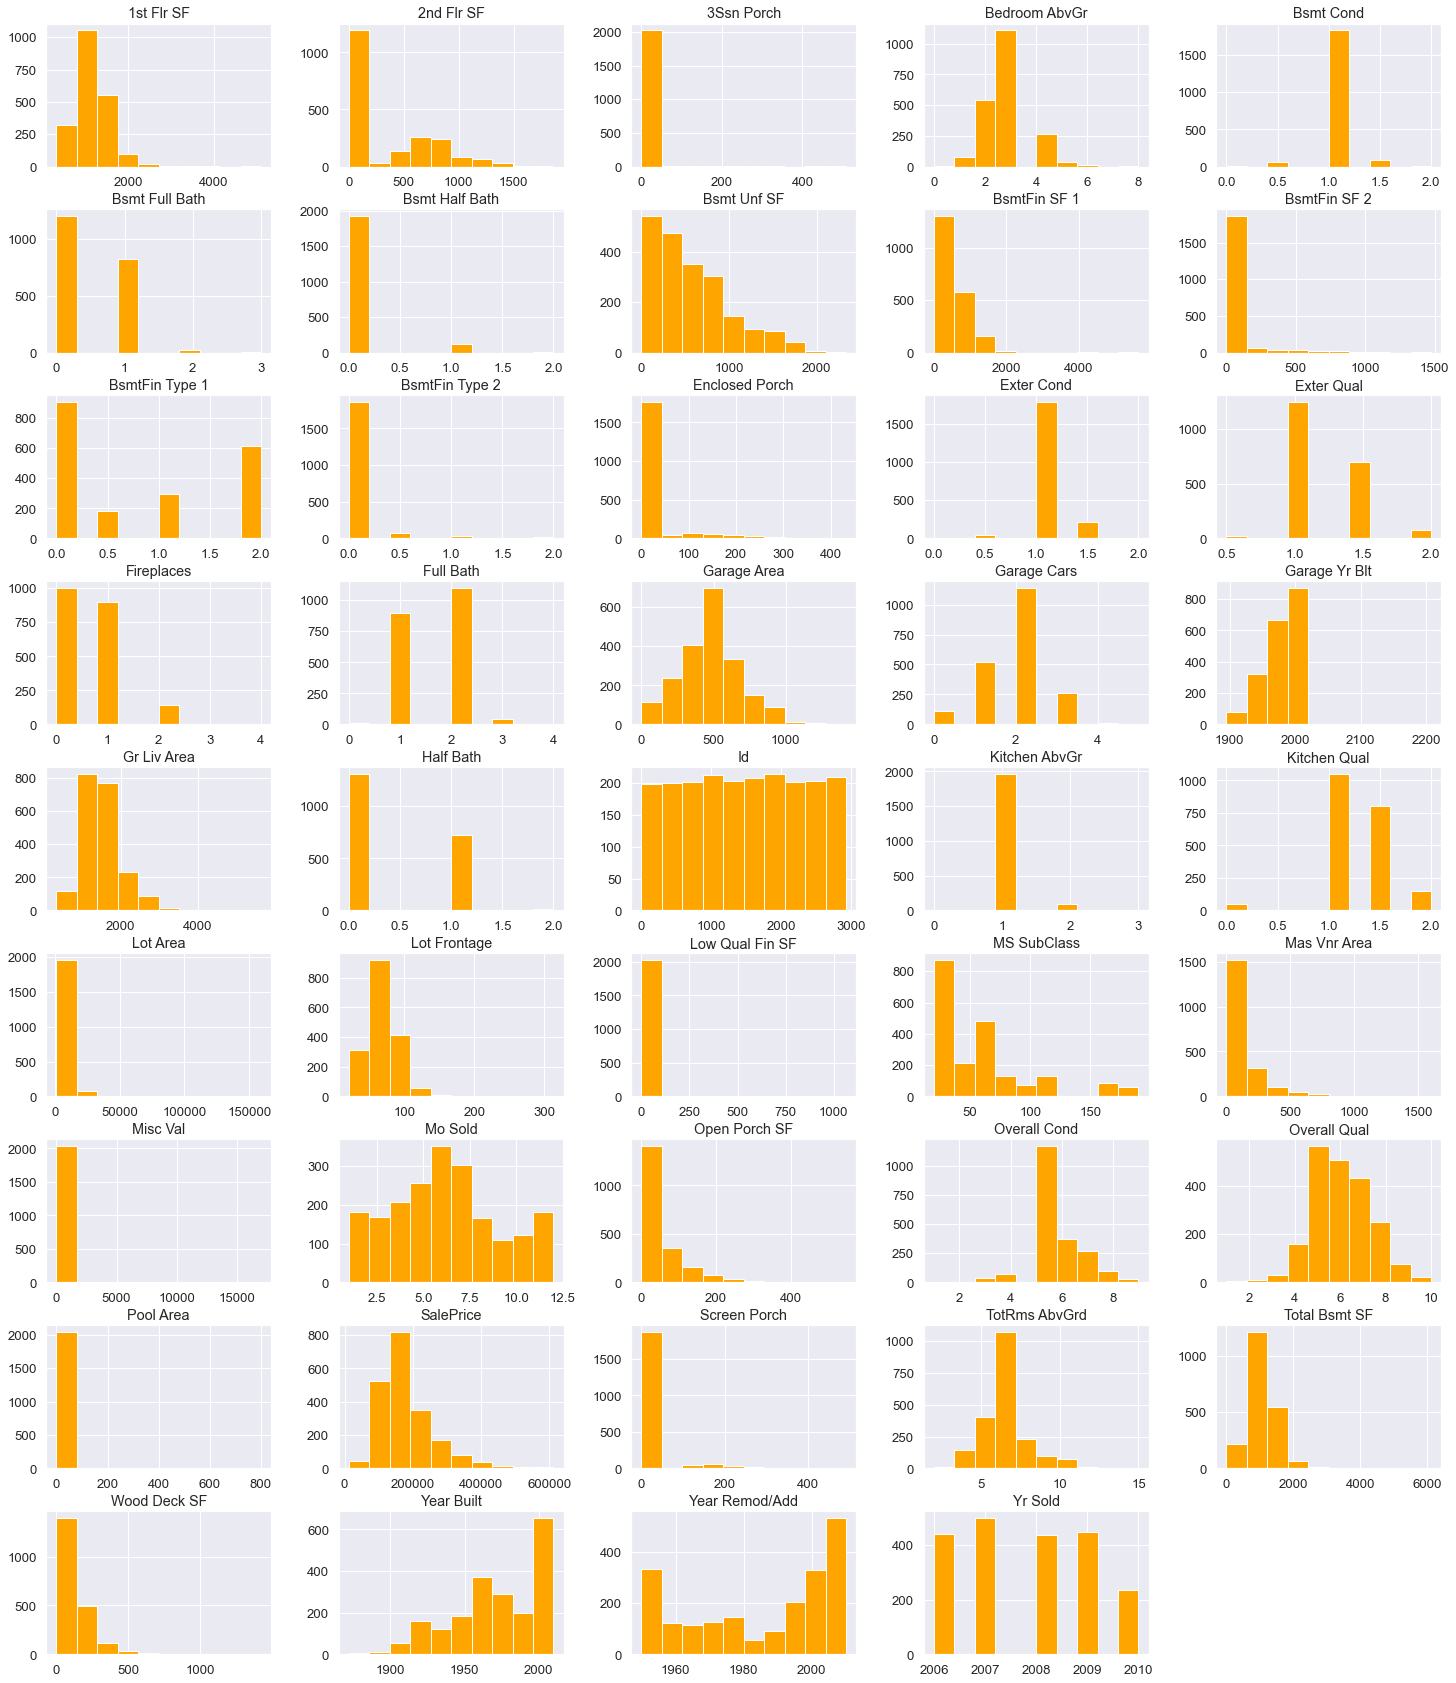

In [21]:
ames_df.hist(figsize=(25, 30), layout=(9, 5), color='Orange');

##### **Some features seem skewed, mostly positively skewed.**

In [22]:
numeric_dtypes = ['int64', 'float64']

quant_cols = []

for i in ames_df.columns:
    if ames_df[i].dtype in numeric_dtypes:
        quant_cols.append(i)
    else:
        pass

In [23]:
quant_vars = pd.DataFrame(ames_df[quant_cols])
quant_vars.skew().sort_values(ascending=False)

Misc Val           20.657398
Pool Area          16.700228
3Ssn Porch         11.827201
Low Qual Fin SF    11.501289
Lot Area            9.204950
BsmtFin Type 2      5.501566
Kitchen AbvGr       4.348274
BsmtFin SF 2        4.239955
Bsmt Half Bath      3.946994
Screen Porch        3.859110
Enclosed Porch      2.864913
Mas Vnr Area        2.594917
Open Porch SF       2.298022
Wood Deck SF        2.017081
Lot Frontage        1.811116
1st Flr SF          1.635146
BsmtFin SF 1        1.603090
SalePrice           1.557551
Total Bsmt SF       1.388913
MS SubClass         1.381004
Gr Liv Area         1.281492
Exter Cond          1.238045
Bsmt Unf SF         0.908480
2nd Flr SF          0.874577
TotRms AbvGrd       0.843940
Exter Qual          0.764199
Half Bath           0.742920
Fireplaces          0.726038
Overall Cond        0.638166
Bsmt Full Bath      0.630856
BsmtFin Type 1      0.431800
Bedroom AbvGr       0.370480
Mo Sold             0.212035
Garage Area         0.199241
Yr Sold       

## Quantitative Data EDA

### Scatterplots for Quantitative Features

''

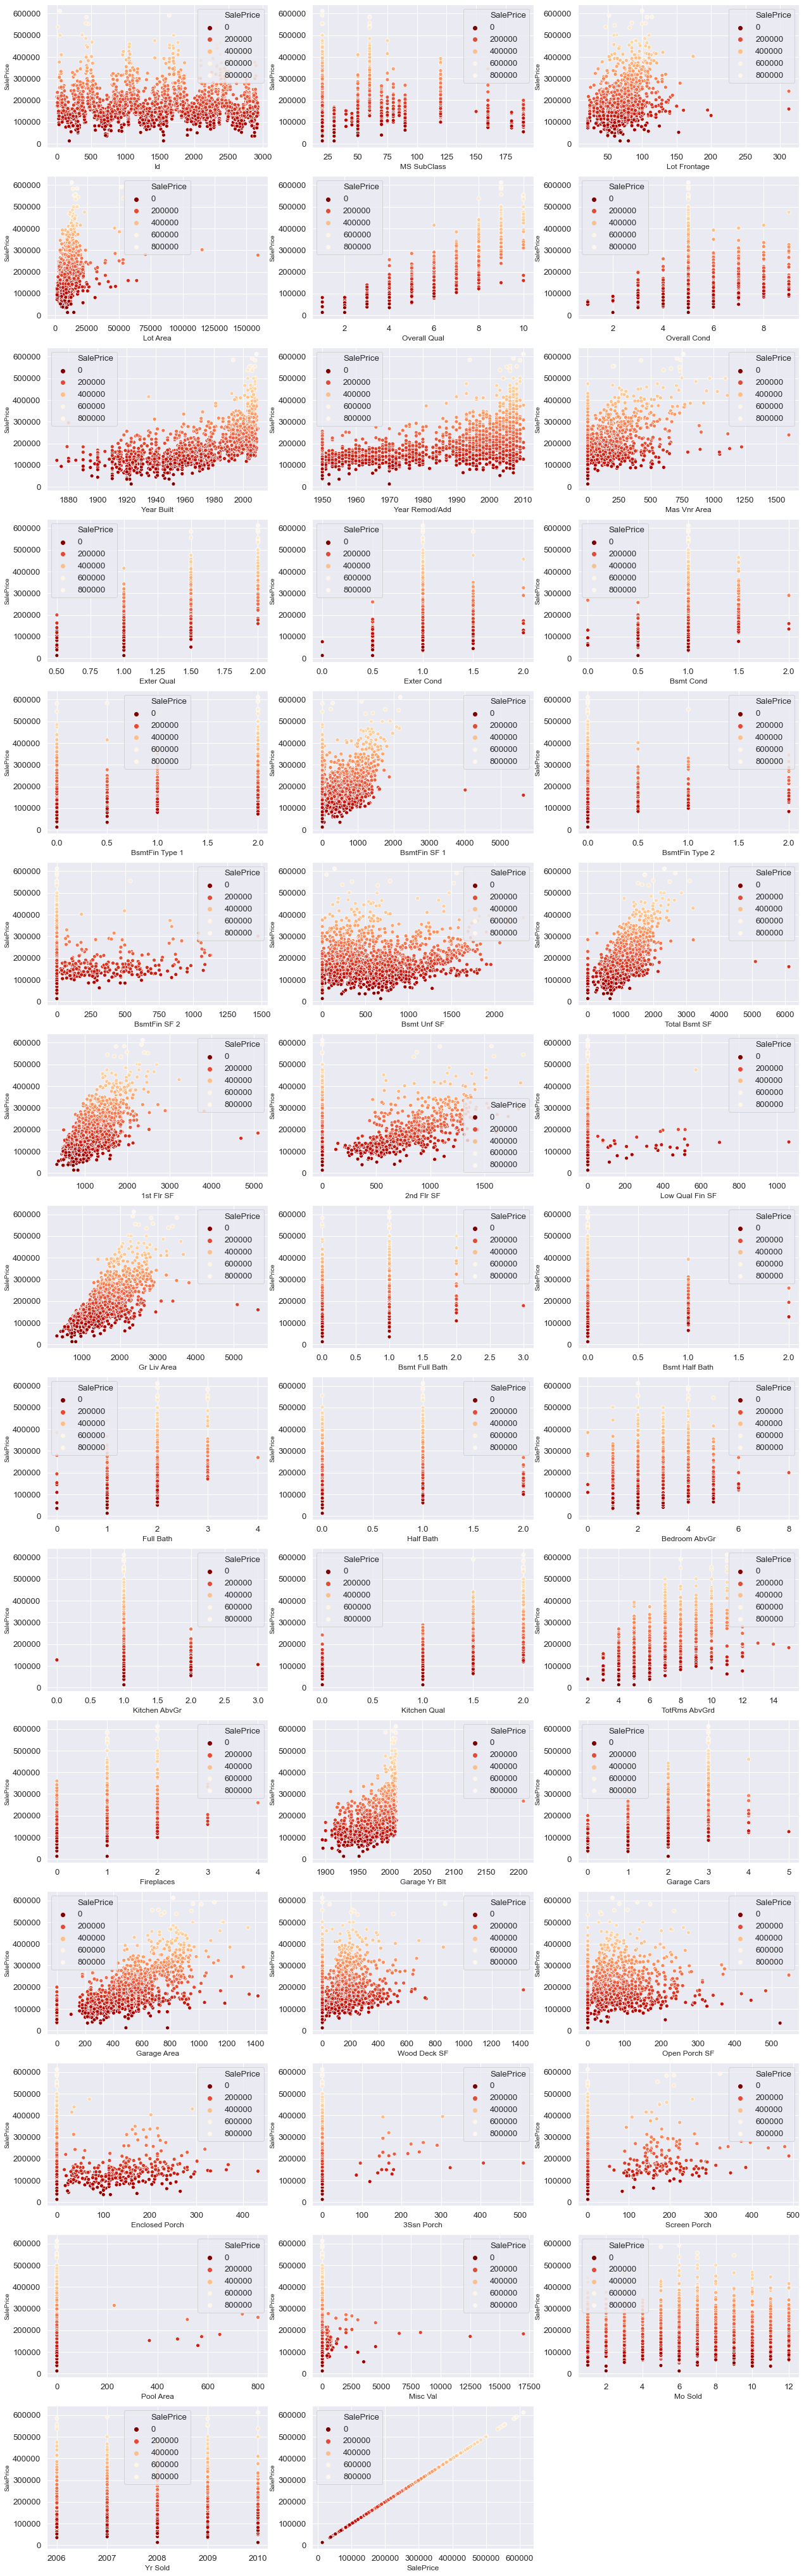

In [24]:
plt.subplots(figsize=(12, 120))
plt.subplots_adjust(right=1.5, top=1.5)

for i, feature in enumerate(list(ames_df[quant_cols]), 1):
    plt.subplot(len(list(quant_cols)), 3, i)
    sns.scatterplot(x=feature,
                    y='SalePrice',
                    hue='SalePrice',
                    palette='OrRd_r',
                    data=ames_df)
    plt.xlabel(f"{feature}", fontsize=12)
    plt.ylabel('SalePrice', fontsize=10)
;

### Visual Findings


#### Linear Relationship w/ SalePrice

- Total Bsmt SF
- 1st Flr SF
- Gr Liv Area - has a few outliers with large area and low price.
- Garage Area

#### Weak Linear Relationship w/ SalePrice

- 2nd Flr SF
- BsmtFin SF 1

##### *Ordinal Variables Will need Separate Plots*

In [25]:
# Dropping Fr Liv Area Outliers
ames_df.drop(ames_df[(ames_df['Gr Liv Area']>4500) & (ames_df['SalePrice']<300000)].index, inplace=True)

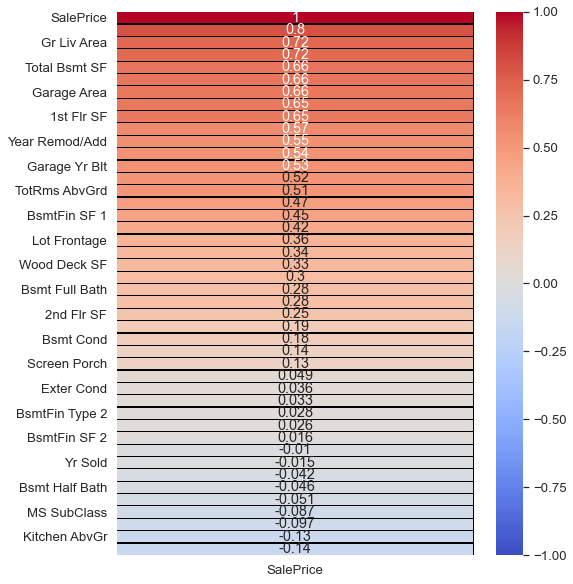

In [26]:
plt.figure(figsize=(8, 10))
sns.heatmap(ames_df.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), linewidth=0.2, linecolor='black', 
            cmap='coolwarm', annot=True, 
            vmin=-1, vmax=1);

#### Insights
 - Features Highly Correlated to Sale Price (Pearson-R > 0.6): Overall Qual, Gr Liv Area, Garage Area, Garage Cars, Total Bsmt SF, and 1st Flr SF.
 
 - Features Moderate Correlation to Sale Price (Pearson-R 0.3 > corr < 0.6): Year Built, Year Remod/Add, Full Bath, Garage Yr Blt,  Max Vnr Area, TotRms AbvGrd, Fireplaces, and BsmtFin SF 1.
 
 - No strong negative correlations,  e.g. Pearson-R < (-0.5)

### Ordinal Data Visualization

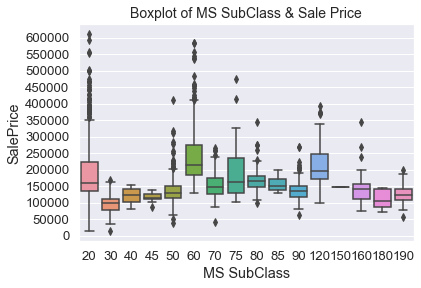

In [27]:
sns.boxplot(x='MS SubClass', y="SalePrice", data=ames_df)
plt.title('Boxplot of MS SubClass & Sale Price', fontsize=14)
plt.yticks(np.arange(0, 650000, step=50000));

#### Insights
##### **Building Class with median price > $200,000**
- 60 2-STORY 1946 & NEWER
- 120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER

##### **Building Class with median price > ~$150,000**
- 20 1-STORY 1946 & NEWER ALL STYLES
- 70 2-STORY 1945 & OLDER
- 75 2-1/2 STORY ALL AGES
- 80 SPLIT OR MULTI-LEVEL
- 85 SPLIT FOYER


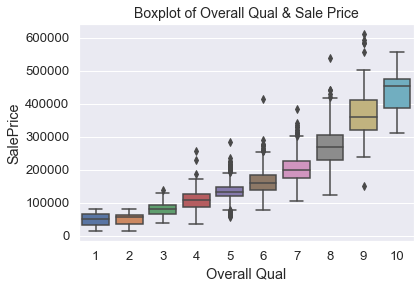

In [28]:
sns.boxplot(x='Overall Qual', y="SalePrice", data=ames_df)
plt.title('Boxplot of Overall Qual & Sale Price', fontsize=14);

#### Insights
- As overall quality increases, price increases.
- Outliers with a high price and low quality, e.g. (Qual < 5) - should be removed.

In [29]:
# Dropping Overal Qual Outliers
ames_df.drop(ames_df[(ames_df['Overall Qual']<5) & (ames_df['SalePrice']>200000)].index, inplace=True)

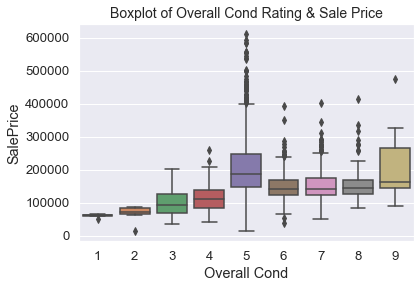

In [30]:
sns.boxplot(x='Overall Cond', y="SalePrice", data=ames_df)
plt.title('Boxplot of Overall Cond Rating & Sale Price', fontsize=14);

#### Insights
- All median prices for Overall Condition are < $200,000
- At conditions > 5, outliers are clearly observed.

In [31]:
ames_df['Year Built'].max()

2010

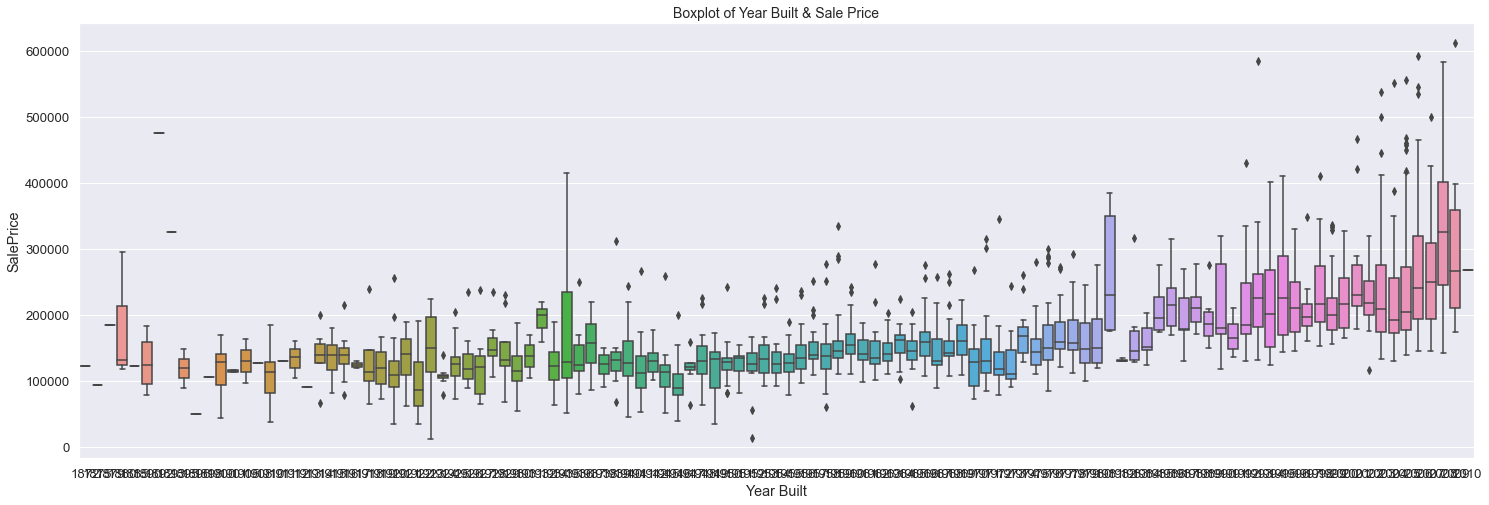

In [32]:
plt.figure(figsize=(25, 8))
sns.boxplot(x='Year Built', y="SalePrice", data=ames_df)
plt.xticks
plt.title('Boxplot of Year Built & Sale Price', fontsize=14);

#### Insights
- The IQR of price increases as year increases.  

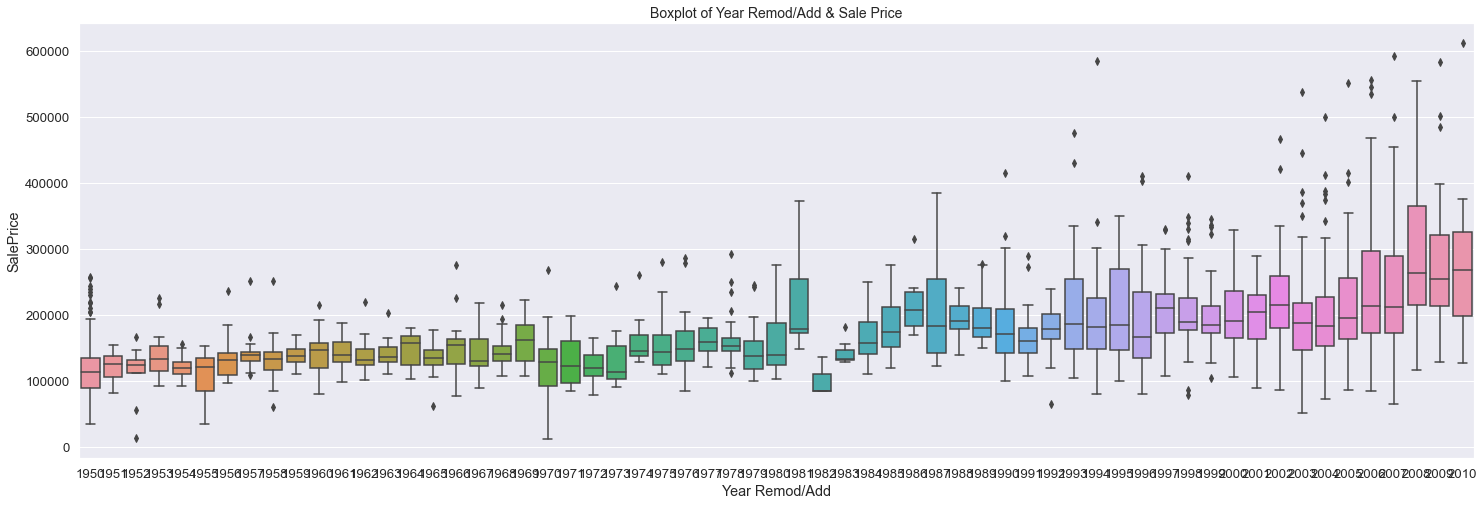

In [33]:
plt.figure(figsize=(25, 8))
sns.boxplot(x='Year Remod/Add', y="SalePrice", data=ames_df)
plt.title('Boxplot of Year Remod/Add & Sale Price', fontsize=14);

#### Insights
- If a home received additions or was remodeled more recently, the IQR of price increases.  

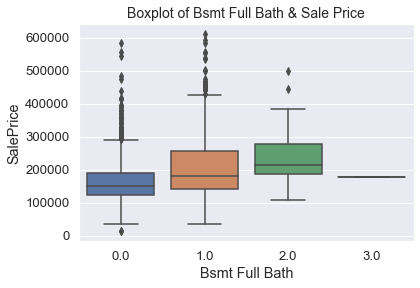

In [34]:
sns.boxplot(x='Bsmt Full Bath', y="SalePrice", data=ames_df)
plt.title('Boxplot of Bsmt Full Bath & Sale Price', fontsize=14);

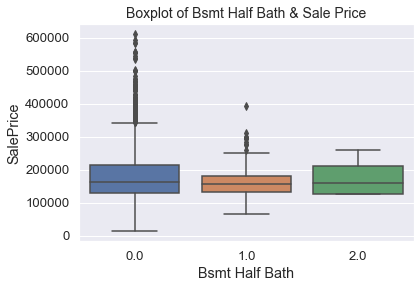

In [35]:
sns.boxplot(x='Bsmt Half Bath', y="SalePrice", data=ames_df)
plt.title('Boxplot of Bsmt Half Bath & Sale Price', fontsize=14);

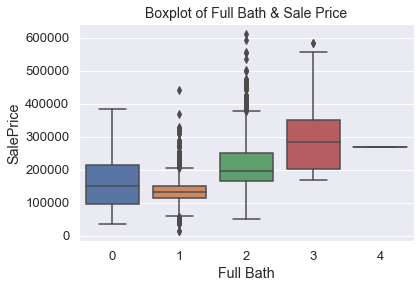

In [36]:
sns.boxplot(x='Full Bath', y="SalePrice", data=ames_df)
plt.title('Boxplot of Full Bath & Sale Price', fontsize=14);

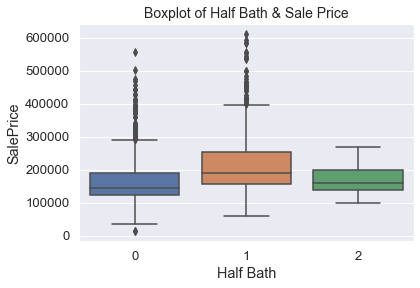

In [37]:
sns.boxplot(x='Half Bath', y="SalePrice", data=ames_df)
plt.title('Boxplot of Half Bath & Sale Price', fontsize=14);

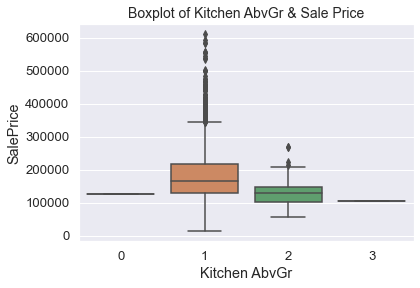

In [38]:
sns.boxplot(x='Kitchen AbvGr', y="SalePrice", data=ames_df)
plt.title('Boxplot of Kitchen AbvGr & Sale Price', fontsize=14);

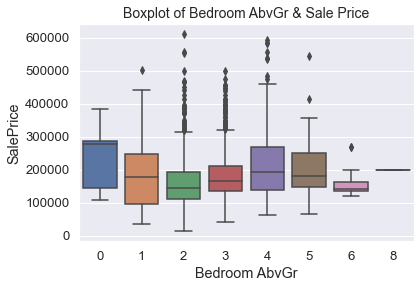

In [39]:
sns.boxplot(x='Bedroom AbvGr', y="SalePrice", data=ames_df)
plt.title('Boxplot of Bedroom AbvGr & Sale Price', fontsize=14);

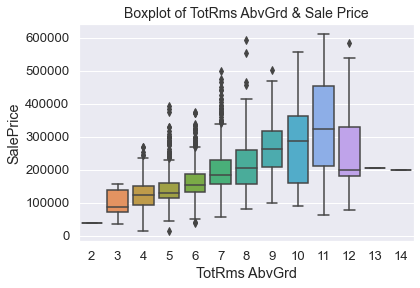

In [40]:
sns.boxplot(x='TotRms AbvGrd', y="SalePrice", data=ames_df)
plt.title('Boxplot of TotRms AbvGrd & Sale Price', fontsize=14);

#### Insights
- As total rooms increase, price increases
- There is a slight diminishing sale price for properties with 12 or more total rooms

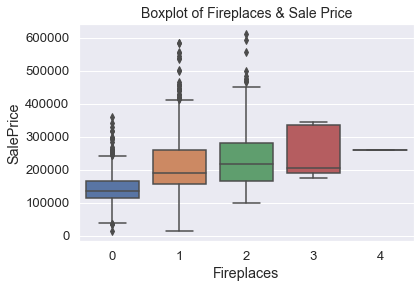

In [41]:
sns.boxplot(x='Fireplaces', y="SalePrice", data=ames_df)
plt.title('Boxplot of Fireplaces & Sale Price', fontsize=14);

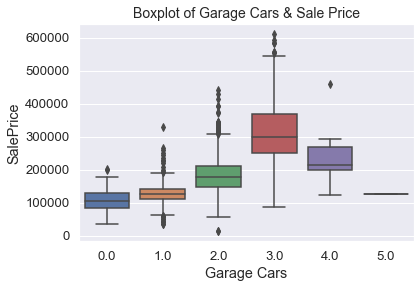

In [42]:
sns.boxplot(x='Garage Cars', y="SalePrice", data=ames_df)
plt.title('Boxplot of Garage Cars & Sale Price', fontsize=14);

#### Insights
- A three-car garage seems to have the best premium on sale price.

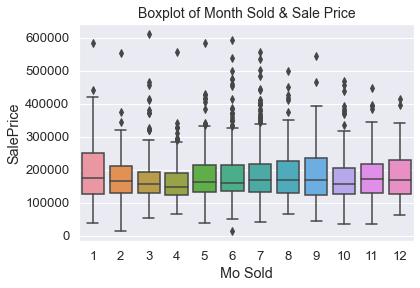

In [43]:
sns.boxplot(x='Mo Sold', y="SalePrice", data=ames_df)
plt.title('Boxplot of Month Sold & Sale Price', fontsize=14);

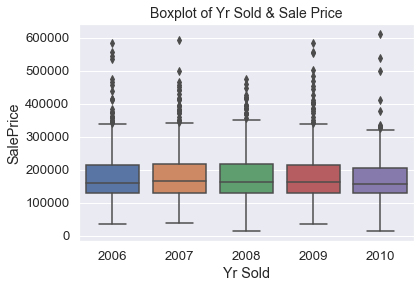

In [44]:
sns.boxplot(x='Yr Sold', y="SalePrice", data=ames_df)
plt.title('Boxplot of Yr Sold & Sale Price', fontsize=14);

## Categorical Data EDA

In [45]:
# Refreshing memory on feature data types
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 0 to 2050
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2047 non-null   int64  
 1   MS SubClass      2047 non-null   int64  
 2   MS Zoning        2047 non-null   object 
 3   Lot Frontage     1718 non-null   float64
 4   Lot Area         2047 non-null   int64  
 5   Street           2047 non-null   object 
 6   Alley            140 non-null    object 
 7   Lot Shape        2047 non-null   object 
 8   Land Contour     2047 non-null   object 
 9   Utilities        2047 non-null   object 
 10  Lot Config       2047 non-null   object 
 11  Land Slope       2047 non-null   object 
 12  Neighborhood     2047 non-null   object 
 13  Condition 1      2047 non-null   object 
 14  Condition 2      2047 non-null   object 
 15  Bldg Type        2047 non-null   object 
 16  House Style      2047 non-null   object 
 17  Overall Qual  

In [46]:
object_dtypes = ['object']
cat_cols = []

for i in ames_df.columns:
    if ames_df[i].dtype in object_dtypes:
        cat_cols.append(i)
    else:
        pass

In [47]:
cat_vars = pd.DataFrame(ames_df[cat_cols])

In [48]:
cat_vars.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type
0,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,...,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
1,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,NaN,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,NaN,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD


''

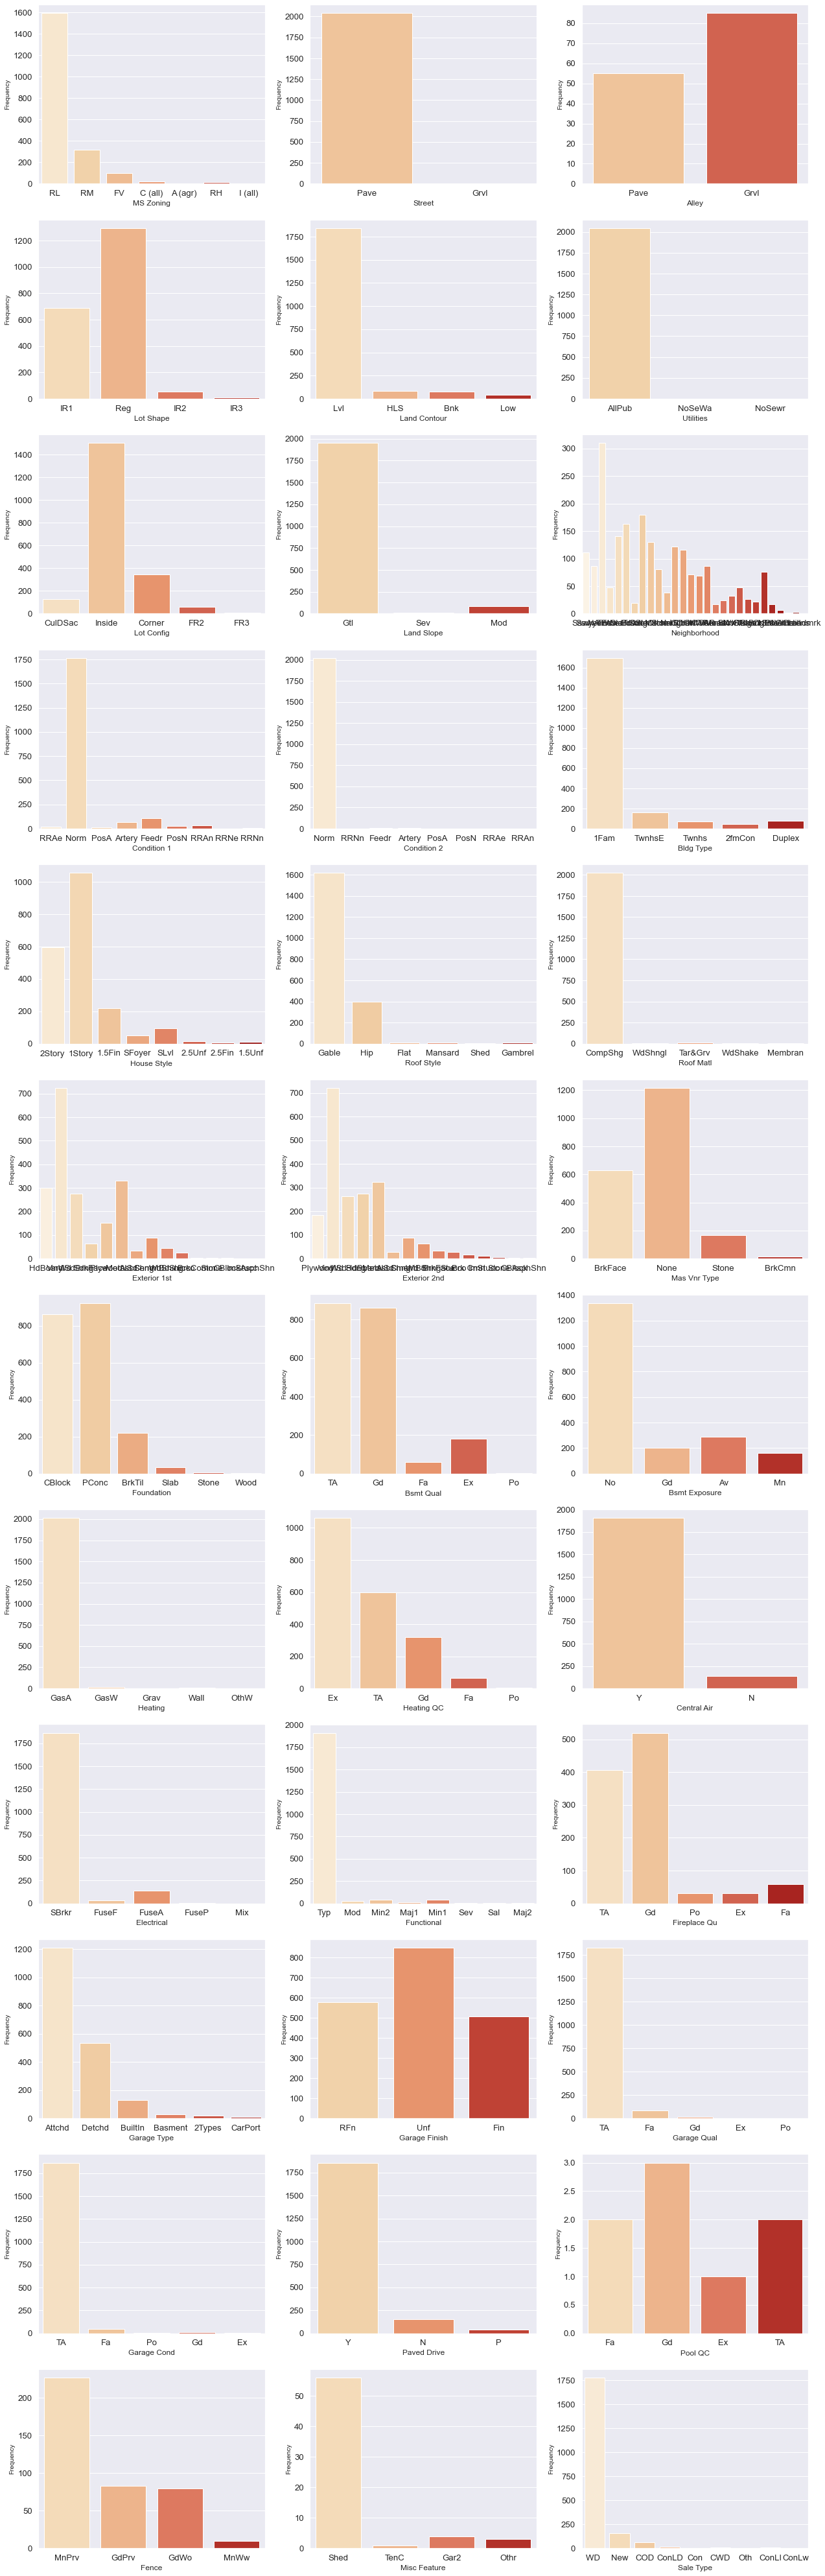

In [49]:


plt.subplots(figsize=(12, 120))
plt.subplots_adjust(right=1.5, top=1.5)

for i, feature in enumerate(list(ames_df[cat_cols]), 1):
    plt.subplot(len(list(cat_cols)), 3, i)
    sns.countplot(x=feature,
                  palette='OrRd',
                  data=ames_df)
    plt.xlabel(f"{feature}", fontsize=12)
    plt.ylabel('Frequency', fontsize=10)
;

### Insights

- The majority of properties are RL (Residential Low Density).
- The roads are paved.
- Alleys are gravel, if the property has an alley.
- Lot shapes are Regular or IR1 (slightly irregular).
- Land Contour is mostly flat (It's Iowa no offense).
- Properties receive public utilities.
- Inside lot is the most common configuration.
- Gentle land slope (Gtl) is most common.
- The proximity to main road or railroad (Condition 1) is normal.
- The proximity to main road or railroad, if second is present (Condition 2) is normal.
- Most Bldg. Types are single family dwellings.
- Most house styles are either o1 or 2 story.
- Gable roof type is most common (with composite shingle).
- Most homes lack masonry, but those that do have brick finishes.
- Exterior Quality is mostly average, with about 700 homes with "good" exterior quality.
- Most home foundations are poured concrete or cinder block.
- Basement quality (height) is mostly above 80 inches.
- Basement condition is average for most homes.  
- No walkout to exterior for most homes via basement.
- Homes with basements have good living quarter finishes, or a second unfinished area.
- Gas heating is most common.
- Most home heating is excellent to average.
- Most homes have central A/C.
- Neighborhood will need a stand-alone visualization.

In [50]:
neighborhood_price = ames_df.groupby('Neighborhood')['SalePrice'].mean()
neighborhood_price

Neighborhood
Blmngtn    200417.681818
Blueste    144566.666667
BrDale     103371.052632
BrkSide    127022.697368
ClearCr    216008.923077
CollgCr    202497.216667
Crawfor    205901.211268
Edwards    129905.787234
Gilbert    189228.387931
Greens     188666.666667
GrnHill    280000.000000
IDOTRR     101103.188406
Landmrk    137000.000000
MeadowV    100231.250000
Mitchel    166905.555556
NAmes      145905.816129
NPkVill    140476.470588
NWAmes     194619.022989
NoRidge    316294.125000
NridgHt    322831.352459
OldTown    125276.300613
SWISU      134758.875000
Sawyer     137181.909910
SawyerW    187760.160920
Somerst    227183.900000
StoneBr    329675.736842
Timber     241051.354167
Veenker    253570.588235
Name: SalePrice, dtype: float64

In [51]:
ames_neighborhood = cat_vars['Neighborhood'].value_counts().sort_values(ascending=False)
ames_neighborhood

NAmes      310
CollgCr    180
OldTown    163
Edwards    141
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     81
BrkSide     76
Crawfor     71
IDOTRR      69
Timber      48
NoRidge     48
StoneBr     38
SWISU       32
ClearCr     26
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

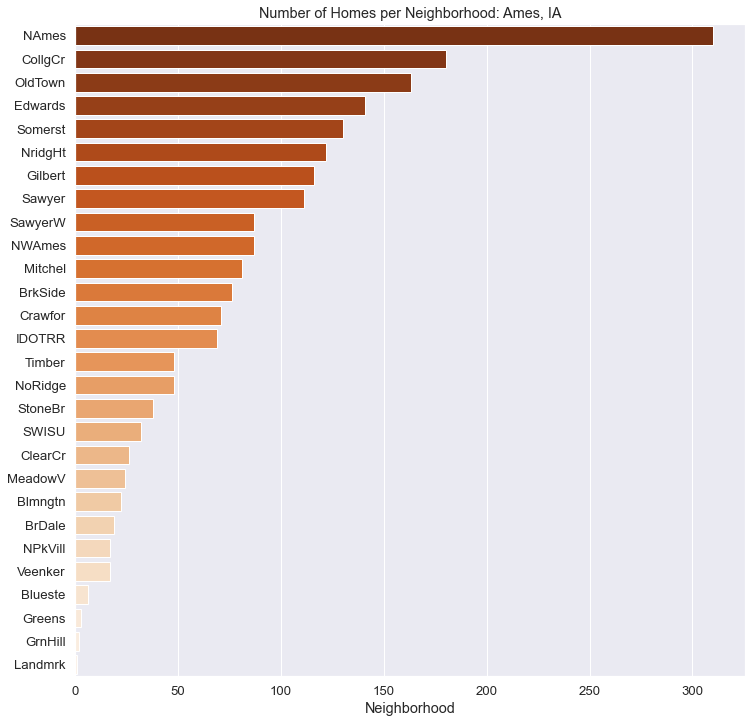

In [52]:
plt.figure(figsize=(12, 12))
sns.barplot(y=ames_neighborhood.index,
            x=ames_neighborhood,
            data=cat_vars,
            palette='Oranges_r')

plt.title('Number of Homes per Neighborhood: Ames, IA');

#### Insights
- North Ames is the most populated neighborhood

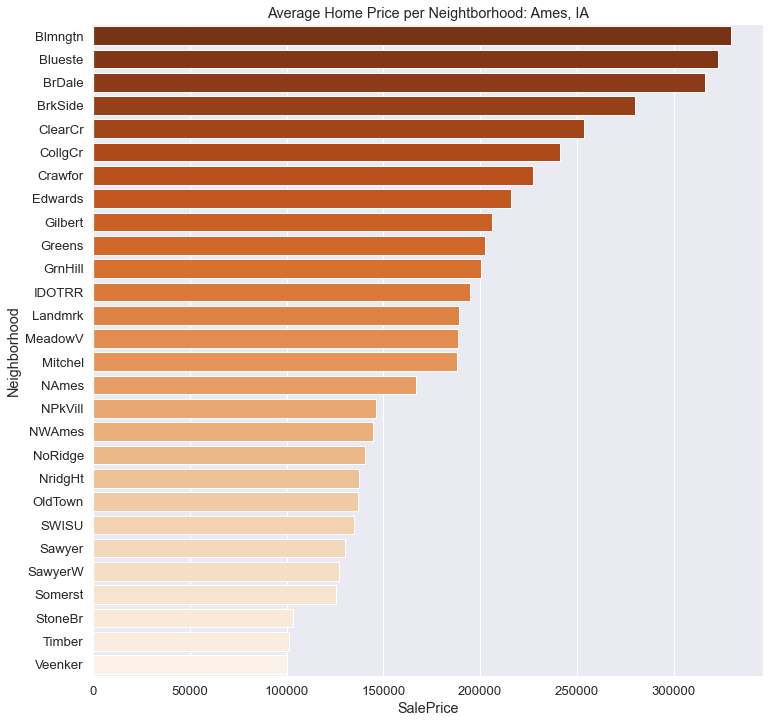

In [53]:
plt.figure(figsize=(12, 12))
sns.barplot(y=neighborhood_price.index,
            x=neighborhood_price.sort_values(ascending=False),
            data=cat_vars,
            palette='Oranges_r')
plt.title('Average Home Price per Neightborhood: Ames, IA');

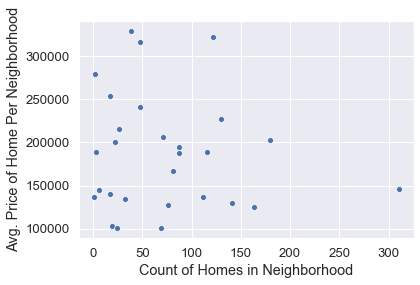

In [54]:
sns.scatterplot(x=ames_neighborhood , y=neighborhood_price)
plt.xlabel('Count of Homes in Neighborhood')
plt.ylabel('Avg. Price of Home Per Neighborhood');

- No clear relationship between average home price and number of homes in neighborhood.

## Data Cleaning

In [55]:
# MSSub Class, YrSold, and MoSold are categorical features - converting to string
ames_df['MS SubClass'] = ames_df['MS SubClass'].astype(str)
ames_df['Yr Sold'] = ames_df['Yr Sold'].astype(str)
ames_df['Mo Sold'] = ames_df['Mo Sold'].astype(str)
ames_df['Garage Yr Blt'] = ames_df['Garage Yr Blt'].astype(str)

In [56]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 0 to 2050
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2047 non-null   int64  
 1   MS SubClass      2047 non-null   object 
 2   MS Zoning        2047 non-null   object 
 3   Lot Frontage     1718 non-null   float64
 4   Lot Area         2047 non-null   int64  
 5   Street           2047 non-null   object 
 6   Alley            140 non-null    object 
 7   Lot Shape        2047 non-null   object 
 8   Land Contour     2047 non-null   object 
 9   Utilities        2047 non-null   object 
 10  Lot Config       2047 non-null   object 
 11  Land Slope       2047 non-null   object 
 12  Neighborhood     2047 non-null   object 
 13  Condition 1      2047 non-null   object 
 14  Condition 2      2047 non-null   object 
 15  Bldg Type        2047 non-null   object 
 16  House Style      2047 non-null   object 
 17  Overall Qual  

In [57]:
# Totaling N/A values
ames_df.isna().sum().sort_values(ascending=False)[:30]

Pool QC           2039
Misc Feature      1983
Alley             1907
Fence             1647
Fireplace Qu      1000
Lot Frontage       329
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Qual           55
Bsmt Cond           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Cars          1
BsmtFin SF 1         1
Garage Area          1
Total Bsmt SF        1
BsmtFin SF 2         1
Bsmt Unf SF          1
Exter Qual           0
Exterior 2nd         0
Exterior 1st         0
Roof Matl            0
Roof Style           0
dtype: int64

In [58]:
# Filling missing values of categorical features with "none".

none_cols = ['Pool QC', 'Misc Feature',  'Alley',
             'Fence', 'Fireplace Qu', 'Garage Cond',
             'Garage Qual', 'Garage Finish', 'Garage Type',
             'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
             'Bsmt Qual', 'Bsmt Cond', 'Mas Vnr Type'
            ]

for i in none_cols:
    ames_df[i] = ames_df[i].fillna('none')
                                             

In [59]:
# Verifying columns were filled
ames_df.isna().sum().sort_values(ascending=False)[:12]

Lot Frontage      329
Mas Vnr Area       22
Bsmt Full Bath      2
Bsmt Half Bath      2
Bsmt Unf SF         1
Total Bsmt SF       1
BsmtFin SF 2        1
BsmtFin SF 1        1
Garage Cars         1
Garage Area         1
Exter Qual          0
Exterior 1st        0
dtype: int64

In [60]:
# Filling missing values of quantitative features with 0.
zero_cols = ['Mas Vnr Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
             'Bsmt Unf SF', 'Garage Cars', 'Garage Area', 
             'Total Bsmt SF', 'BsmtFin SF 1', 'BsmtFin SF 2'
            ]

for i in zero_cols:
    ames_df[i] = ames_df[i].fillna(0)

In [61]:
# Verifying columns were filled
ames_df.isna().sum().sort_values(ascending=False)[:12]

Lot Frontage      329
SalePrice           0
Foundation          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type        0
Mas Vnr Area        0
Exter Qual          0
Exter Cond          0
Bsmt Qual           0
Year Remod/Add      0
dtype: int64

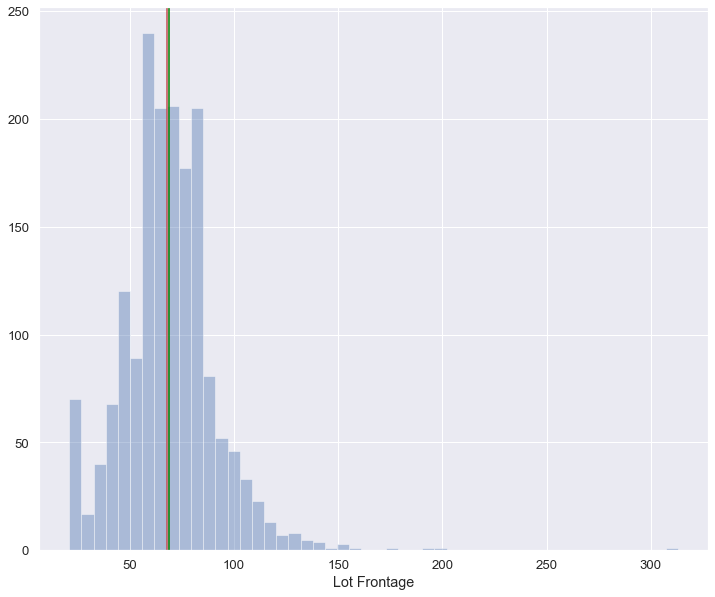

In [62]:
# Visualizing Lot Frontage Distribution
plt.figure(figsize=(12, 10))
sns.distplot(ames_df['Lot Frontage'], kde=False)
plt.axvline(ames_df['Lot Frontage'].mean(), label='mean', c='green')
plt.axvline(ames_df['Lot Frontage'].median(), label='median', c='r');

In [63]:
print(f"Lot Frontage Mean: {ames_df['Lot Frontage'].mean()}")
print(f"Lot Frontage Median: {ames_df['Lot Frontage'].median()}")
print(f"Lot Frontage Mode: {ames_df['Lot Frontage'].mode()}")

Lot Frontage Mean: 68.87601862630966
Lot Frontage Median: 68.0
Lot Frontage Mode: 0    60.0
dtype: float64


#### Identifying potential values to fill Lot Frontage with

In [64]:
ames_df.groupby('MS Zoning')['Lot Frontage'].median()

MS Zoning
A (agr)    102.5
C (all)     60.0
FV          65.0
I (all)    109.0
RH          55.0
RL          70.0
RM          52.0
Name: Lot Frontage, dtype: float64

- RL (Residential Low Density) was the most common zone type, but its median of lot frontage is greater than the overall lot frontage median.
- Not the best option.

In [65]:
ames_df.groupby('Lot Shape')['Lot Frontage'].median()

Lot Shape
IR1    73.0
IR2    51.0
IR3    66.0
Reg    65.0
Name: Lot Frontage, dtype: float64

- Reg lot type is most common within data and its median Lot Frontage is similar to the overall Lot Frontage mean
- IR1 was second most common but the mean value there is too high to impute.

In [66]:
ames_df.groupby('Neighborhood')['Lot Frontage'].median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.0
ClearCr    82.5
CollgCr    70.0
Crawfor    64.0
Edwards    62.0
Gilbert    63.0
Greens     40.0
GrnHill     NaN
IDOTRR     60.0
Landmrk     NaN
MeadowV    21.0
Mitchel    73.0
NAmes      72.0
NPkVill    24.0
NWAmes     80.0
NoRidge    88.5
NridgHt    93.0
OldTown    60.0
SWISU      60.0
Sawyer     70.0
SawyerW    67.0
Somerst    73.0
StoneBr    60.0
Timber     79.0
Veenker    80.0
Name: Lot Frontage, dtype: float64

- Imputing missing lot frontage values with the neighborhood mean lot frontage makes sense. It is a value that is specific to each neighborhood, creating variance with the imputed values - essentially lowering bias.

In [67]:
ames_df.groupby('Lot Config')['Lot Frontage'].median()

Lot Config
Corner     80.0
CulDSac    50.0
FR2        60.0
FR3        80.0
Inside     66.0
Name: Lot Frontage, dtype: float64

- The lot config values could be possibilities to impute missing values, but neighborhood has more variety.

In [68]:
ames_df.groupby('Neighborhood')['Lot Frontage'].median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.0
ClearCr    82.5
CollgCr    70.0
Crawfor    64.0
Edwards    62.0
Gilbert    63.0
Greens     40.0
GrnHill     NaN
IDOTRR     60.0
Landmrk     NaN
MeadowV    21.0
Mitchel    73.0
NAmes      72.0
NPkVill    24.0
NWAmes     80.0
NoRidge    88.5
NridgHt    93.0
OldTown    60.0
SWISU      60.0
Sawyer     70.0
SawyerW    67.0
Somerst    73.0
StoneBr    60.0
Timber     79.0
Veenker    80.0
Name: Lot Frontage, dtype: float64

- GrnHill and Landmrk will still need to be filled.

In [69]:
# Imputing missing values for lot frontage
ames_df['Lot Frontage'] = ames_df.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.median()))

In [70]:
# Verifying columns were filled 
ames_df.isnull().sum()

Id              0
MS SubClass     0
MS Zoning       0
Lot Frontage    3
Lot Area        0
               ..
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
SalePrice       0
Length: 80, dtype: int64

In [71]:
ames_df[ames_df['Neighborhood'] == 'GrnHill']

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
463,2257,120,RM,NaN,9763,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,9,2007,WD,330000
1211,2893,120,RM,NaN,8239,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,11,2006,WD,230000


In [72]:
ames_df[ames_df['Neighborhood'] == 'Landmrk']

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1121,2789,160,RH,NaN,3612,Pave,none,IR1,Lvl,AllPub,...,0,0,none,MnPrv,none,0,6,2006,WD,137000


- Since the neighborhood median for these values is not known, i will impute the lot config median for the inside type, which is 68.0.

In [73]:
ames_df['Lot Frontage'].fillna(68.0, inplace=True)

In [74]:
ames_df[ames_df['Neighborhood'] == 'Landmrk']

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1121,2789,160,RH,68.0,3612,Pave,none,IR1,Lvl,AllPub,...,0,0,none,MnPrv,none,0,6,2006,WD,137000


In [75]:
ames_df[ames_df['Neighborhood'] == 'GrnHill']

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
463,2257,120,RM,68.0,9763,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,9,2007,WD,330000
1211,2893,120,RM,68.0,8239,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,11,2006,WD,230000


In [76]:
pd.set_option("display.max_rows", 999)
ames_df.isnull().any()

Id                 False
MS SubClass        False
MS Zoning          False
Lot Frontage       False
Lot Area           False
Street             False
Alley              False
Lot Shape          False
Land Contour       False
Utilities          False
Lot Config         False
Land Slope         False
Neighborhood       False
Condition 1        False
Condition 2        False
Bldg Type          False
House Style        False
Overall Qual       False
Overall Cond       False
Year Built         False
Year Remod/Add     False
Roof Style         False
Roof Matl          False
Exterior 1st       False
Exterior 2nd       False
Mas Vnr Type       False
Mas Vnr Area       False
Exter Qual         False
Exter Cond         False
Foundation         False
Bsmt Qual          False
Bsmt Cond          False
Bsmt Exposure      False
BsmtFin Type 1     False
BsmtFin SF 1       False
BsmtFin Type 2     False
BsmtFin SF 2       False
Bsmt Unf SF        False
Total Bsmt SF      False
Heating            False


# Test.csv Cleaning

In [77]:
test_df.head()

NameError: name 'test_df' is not defined

In [ ]:
test_df.info()

In [ ]:
# Dropping PID Column
test_df.drop(columns=['PID'], inplace=True)

test_df.head()

In [ ]:
test_df.info()

In [ ]:
test_df.isnull().sum().sort_values(ascending=False)[:30]

In [ ]:
# MSSub Class, YrSold, MoSold, and Garage Yr Blt are categorical features - converting to string
test_df['MS SubClass'] = test_df['MS SubClass'].astype(str)
test_df['Yr Sold'] = test_df['Yr Sold'].astype(str)
test_df['Mo Sold'] = test_df['Mo Sold'].astype(str)
test_df['Garage Yr Blt'] = test_df['Garage Yr Blt'].astype(str)

In [ ]:
# Filling missing values of categorical features with "none".

none_cols = ['Pool QC', 'Misc Feature',  'Alley',
             'Fence', 'Fireplace Qu', 'Garage Cond',
             'Garage Qual', 'Garage Finish', 'Garage Type',
             'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
             'Bsmt Qual', 'Bsmt Cond', 'Mas Vnr Type'
            ]

for i in none_cols:
    test_df[i] = test_df[i].fillna('none')


In [ ]:
test_df['Electrical'] = test_df['Electrical'].fillna('SBrkr') 

In [ ]:
test_df.isnull().sum().sort_values(ascending=False)[:30]

In [ ]:
# Imputing missing value for Mas  Vnr Area
test_df['Mas Vnr Area'] = test_df['Mas Vnr Area'].fillna(0) 

In [ ]:
# Imputing missing values for lot frontage
test_df['Lot Frontage'] = test_df.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.median()))

In [ ]:
pd.set_option("display.max_rows", 999)
test_df.isnull().any()

In [ ]:
print(len(ames_df.columns))
print(len(test_df.columns))

In [ ]:
list(zip(ames_df.columns,test_df.columns))

In [ ]:
# Eporting Clean CSVs
# ames_df.to_csv('./datasets/clean-train.csv', index=False)
# test_df.to_csv('./datasets/clean-test.csv', index=False)

# Presentation Slides